In [1]:
%cd ../
%run embmi/main.py

/Users/takedasei/Develop/github.com/k-kyoko/embmi-2021

########## Set Program Config ##########
# Load YAML Config File
  Done
# Interpolate configuration
  Done
# Create Output dir at ./analysis_result/
  Done
# Validate the content
  Done
> Load finished
> Current Settings
  input_dir: ./data_ST/day1
  output_dir: ./analysis_result/
  test_run: false
  experiment:
    file_pattern: day[1-5]_t[1-6].pkl
    param_pattern: day[1-5]_t[1-6]_param.pkl
    eye_pattern: eyeclosed.txt
    n_Ch: 129
    n_Trial: 25
    n_Session: 6
    Ref_ch:
    - 57
    - 100
    COI:
    - 7
    - 31
    - 36
    - 55
    - 80
    - 104
    - 105
    - 106
    - 112
    - 129
    ignore_pattern: day5_t[1-2].pkl
    ignore_files:
    - day4_t3.pkl
  filter:
    Fs: 1000.0
    Bandpass:
    - 0.01
    - 20.0
    Notch:
    - 49.0
    - 51.0
    butter_N: 3
    Wn:
    - 2.0e-05
    - 0.04
    StopWn:
    - 0.098
    - 0.102
########## DONE::Set Program Config ##########

########## Data Loading ##########
#

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.94it/s]


> got file data(first data):
  {'__header__': b'Net Station 5.0 MAT-file, Platform: MACI64, Created on: Sun Aug 01 14:00:14 2021', ...
  Done
> Load param


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 649.37it/s]


> got param data(first data):
  {'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Sun Aug  1 12:34:42 2021', '__v...
  Done
> Load eye


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 368.57it/s]


> got eye data(first data):
      session1
  1          0
  2          0
  3          0
  4          0
  5          1
  6          0
  7        ...
  Done
  Done
########## DONE::Data Loading ##########

########## Process Data ##########
# Parse Separated Dictionary data to DataClass


1it [00:00, 3734.91it/s]


> EXData Loaded
  Exdata(session=1, EEG=array([[-11303.478 , -11314.232 , -11308.21  , ...,      0.    ,
               ...
  Done
# Cut off while no-signal
  Done
# Apply Filter


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.21s/it]


  Done
# Search trial info
  Done
# Remove eyeclosed data


1it [00:00, 442.06it/s]


# Dropped Trial in session1
  trial5trial15
  Done
# Split Session data by trial & Add Session Type


1it [00:00, 1529.09it/s]


> Created master table
  trial1:
  (22, array([[158.49213041, 158.45976934, 158.41657354, ..., 145.71794697,
          145.47928201, 145.24238731],
         [ 45.58075338,  45.61313389,  45.63799326, ...,  36.0669577 ,
           35.89087637,  35.72772693],
         [ -1.02905824,  -0.90983057,  -0.79796029, ...,   3.62488018,
            3.54393868,   3.46924236],
         ...,
         [ 15.20860357,  15.09047692,  14.95148799, ...,  -3.49540545,
           -3.44885697,  -3.39859492],
         [  8.08101549,   7.97841349,   7.85518706, ...,   7.99496265,
            8.0988541 ,   8.20042523],
         [  0.        ,   0.        ,   0.        , ...,   0.        ,
            0.        ,   0.        ]]))
  Done
# Split Session data by trial and its type


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 7410.43it/s]

  Done
########## DONE::Process Data ##########


In [2]:
s = {}
for k, v in data['exdata'][0].DIN:
    if k not in s.keys():
        s[k] = 0
    else:
        s[k] += 1

s

{'DIN3': 8, 'DIN1': 13, 'DIN6': 6, 'DIN2': 23, 'DIN4': 7, 'DIN7': 7, 'DIN5': 7}

In [4]:
def calibration(data):
    for s in data:
        for k, v in s.items():
            temp = v[:, :] - (v[conf.experiment.Ref_ch[0], :] + v[conf.experiment.Ref_ch[1], :])/2
    return temp


erp = [calibration(d) for d in [data['master_true'], data['master_fake'], data['master_emg']]]

In [5]:
import matplotlib.pyplot as plt

In [13]:
idx_coi = [i - 1 for i in conf.experiment.COI]

df = [pd.DataFrame(e[idx_coi, :], columns=range(-1000, 1000), index=conf.experiment.COI) for e in erp]
df_mean = pd.DataFrame([d.mean(0) for d in df], index=['true', 'fake', 'emg']).T

In [16]:
df_mean

,true,fake,emg
-1000,-47.651129,6.258461,-53.292399
-999,-47.665130,6.254829,-53.268326
-998,-47.661073,6.235998,-53.261721
-997,-47.639098,6.202397,-53.273354
-996,-47.599533,6.154548,-53.303576
...,...,...,...
995,-63.530949,-11.719157,-55.199242
996,-63.552967,-11.228682,-55.353822
997,-63.531458,-10.781243,-55.516428
998,-63.466164,-10.379145,-55.684792


<AxesSubplot:title={'center':'True Fake and EMG (0 = DIN6)'}>

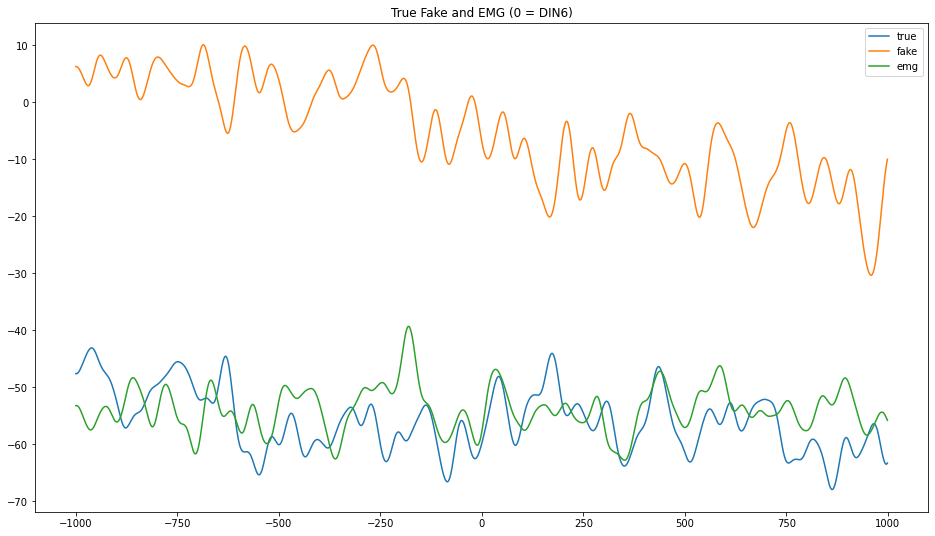

In [36]:
df_mean.plot(title='True Fake and EMG (0 = DIN6)', figsize=(16, 9))

,true,fake,emg
0,1350,1301,1351


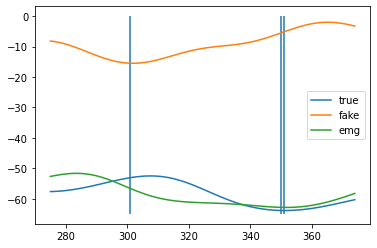

In [27]:
target_range = range(1275, 1375)
df_peak = df_mean.iloc[target_range].apply(
    lambda x: pd.Series(scipy.signal.find_peaks(-x)[0] + 1275 - 1)
)
df_mean.iloc[range(1275, 1375)].plot()
plt.vlines(df_peak-1000, -65, 0)
df_peak

<AxesSubplot:title={'center':'True Fake and EMG with COI Data (0 = Peak)'}>

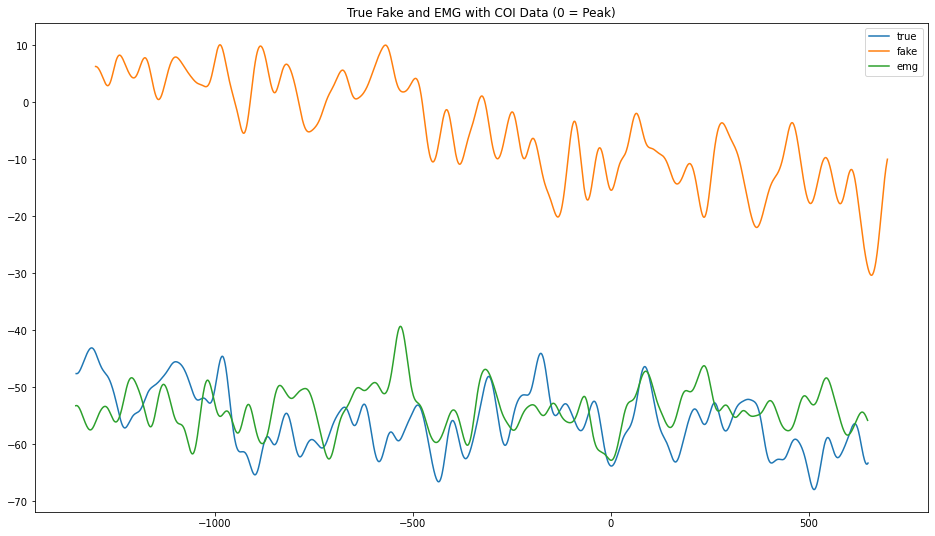

In [37]:
_df_true = df_mean.true
_df_true.index = range(-df_peak.true[0], 2000 - df_peak.true[0])
_df_fake = df_mean.fake
_df_fake.index = range(-df_peak.fake[0], 2000 - df_peak.fake[0])
_df_emg = df_mean.emg
_df_emg.index = range(-df_peak.emg[0], 2000 - df_peak.emg[0])

df_fix = pd.DataFrame([
    _df_true,
    _df_fake,
    _df_emg
]).T

df_fix.plot(title='True Fake and EMG with COI Data (0 = Peak)', figsize=(16, 9))

<AxesSubplot:title={'center':'True Fake and EMG with ALL Data (0 = Peak)'}>

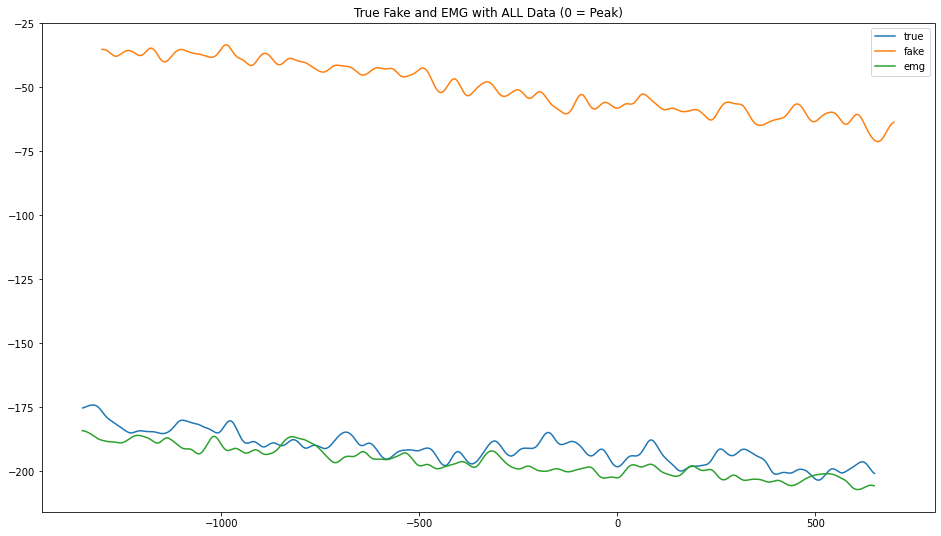

In [36]:
df_all = [pd.DataFrame(e, columns=range(-1000, 1000)) for e in erp]
df_mean_all = pd.DataFrame([d.mean(0) for d in df_all], index=['true', 'fake', 'emg']).T

_df_true = df_mean_all.true
_df_true.index = range(-df_peak.true[0], 2000 - df_peak.true[0])
_df_fake = df_mean_all.fake
_df_fake.index = range(-df_peak.fake[0], 2000 - df_peak.fake[0])
_df_emg = df_mean_all.emg
_df_emg.index = range(-df_peak.emg[0], 2000 - df_peak.emg[0])

df_fix_all = pd.DataFrame([
    _df_true,
    _df_fake,
    _df_emg
]).T

df_fix_all.plot(title='True Fake and EMG with ALL Data (0 = Peak)', figsize=(16, 9))

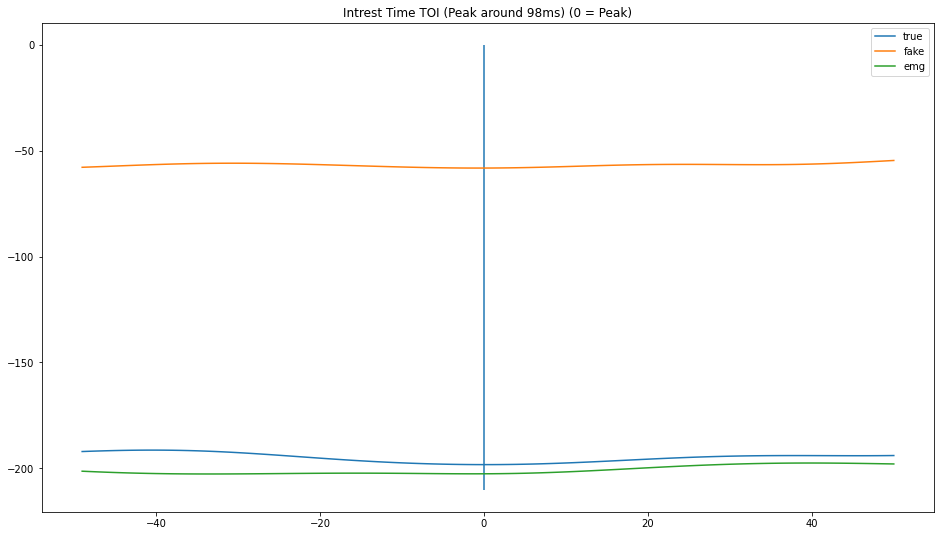

In [40]:
df_fix_all.loc[-49:50].plot(title='Intrest Time TOI (Peak around 98ms) (0 = Peak)', figsize=(16, 9))
plt.vlines(0, -210, 0)

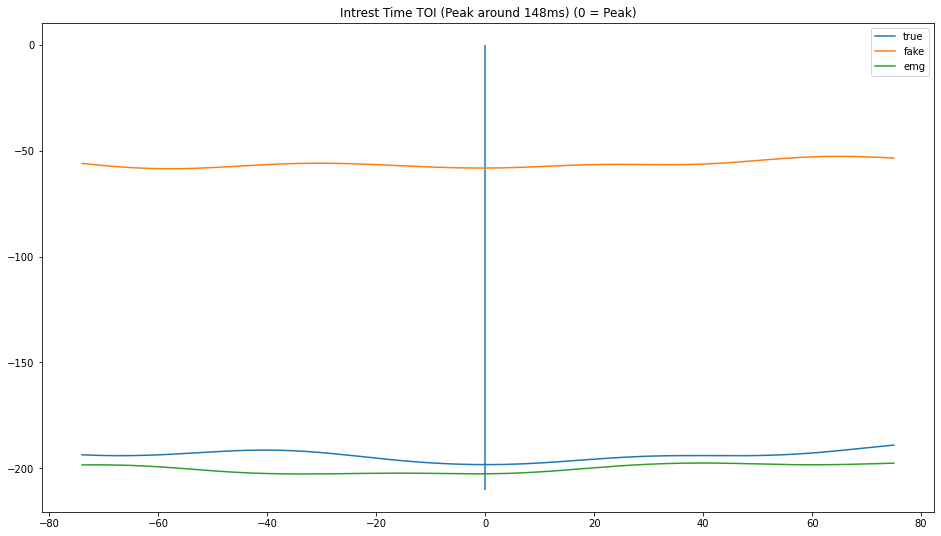

In [42]:
df_fix_all.loc[-74:75].plot(title='Intrest Time TOI (Peak around 148ms) (0 = Peak)', figsize=(16, 9))
plt.vlines(0, -210, 0)